### 데이터 로딩 

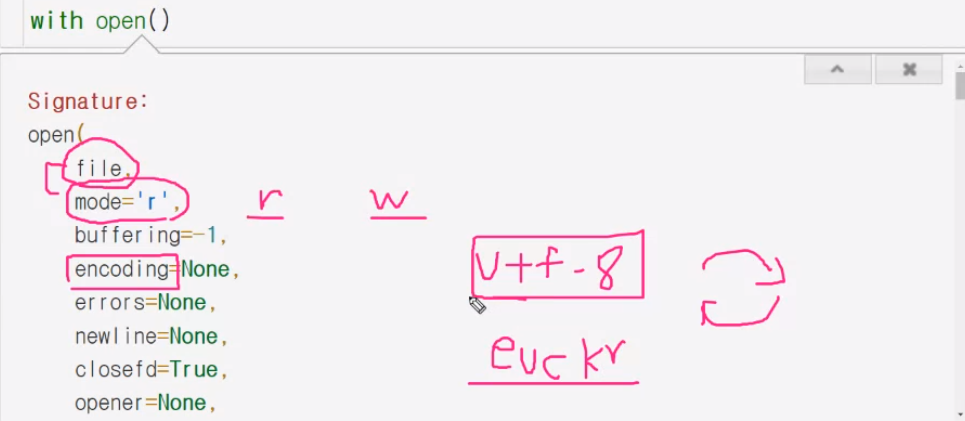

In [1]:
with open("./ratings_train.txt",'r',encoding="utf-8") as f :
    data = f.readlines() #\n을 기준으로 끊어서 

data[:15]

['id\tdocument\tlabel\n',
 '9976970\t아 더빙.. 진짜 짜증나네요 목소리\t0\n',
 '3819312\t흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나\t1\n',
 '10265843\t너무재밓었다그래서보는것을추천한다\t0\n',
 '9045019\t교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정\t0\n',
 '6483659\t사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 던스트가 너무나도 이뻐보였다\t1\n',
 '5403919\t막 걸음마 뗀 3세부터 초등학교 1학년생인 8살용영화.ㅋㅋㅋ...별반개도 아까움.\t0\n',
 '7797314\t원작의 긴장감을 제대로 살려내지못했다.\t0\n',
 '9443947\t별 반개도 아깝다 욕나온다 이응경 길용우 연기생활이몇년인지..정말 발로해도 그것보단 낫겟다 납치.감금만반복반복..이드라마는 가족도없다 연기못하는사람만모엿네\t0\n',
 '7156791\t액션이 없는데도 재미 있는 몇안되는 영화\t1\n',
 '5912145\t왜케 평점이 낮은건데? 꽤 볼만한데.. 헐리우드식 화려함에만 너무 길들여져 있나?\t1\n',
 '9008700\t걍인피니트가짱이다.진짜짱이다♥\t1\n',
 '10217543\t볼때마다 눈물나서 죽겠다90년대의 향수자극!!허진호는 감성절제멜로의 달인이다~\t1\n',
 '5957425\t울면서 손들고 횡단보도 건널때 뛰쳐나올뻔 이범수 연기 드럽게못해\t0\n',
 '8628627\t담백하고 깔끔해서 좋다. 신문기사로만 보다 보면 자꾸 잊어버린다. 그들도 사람이었다는 것을.\t1\n']

#### 전체 데이터 수 확인

In [2]:
len(data[1:])

150000

#### 리뷰데이터 추출 

In [3]:
rw_list = []
for d in data[1:] :
    split_rw = d.split("\t")
    rw_list.append(split_rw[1])
    

In [4]:
rw_list[:10]

['아 더빙.. 진짜 짜증나네요 목소리',
 '흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나',
 '너무재밓었다그래서보는것을추천한다',
 '교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정',
 '사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 던스트가 너무나도 이뻐보였다',
 '막 걸음마 뗀 3세부터 초등학교 1학년생인 8살용영화.ㅋㅋㅋ...별반개도 아까움.',
 '원작의 긴장감을 제대로 살려내지못했다.',
 '별 반개도 아깝다 욕나온다 이응경 길용우 연기생활이몇년인지..정말 발로해도 그것보단 낫겟다 납치.감금만반복반복..이드라마는 가족도없다 연기못하는사람만모엿네',
 '액션이 없는데도 재미 있는 몇안되는 영화',
 '왜케 평점이 낮은건데? 꽤 볼만한데.. 헐리우드식 화려함에만 너무 길들여져 있나?']

####  연습문제 1 (난이도 ⭐)
- 15만 개의 리뷰 중에 특정 단어가 들어간 리뷰의 갯수를 파악해보자

In [5]:
keyword = input("검색하려는 단어 입력 : ")
cnt = 0

for rd in rw_list :
    if keyword in rd :
        cnt += 1
    

print(f"15만개의 리뷰 중 {keyword}는(은) 총 {cnt}개 리뷰에 등장했습니다.")

KeyboardInterrupt: Interrupted by user

#### 연습문제 2 (난이도  ⭐⭐) : 통계
- 15만개 리뷰들의 길이를 통계 내보자.
- 10글자 미만 / 10 ~ 20글자 미만 / 20글자 이상

In [ ]:
# step 1. 반복문을 이용해 전체 리뷰길이를 측정
# step 2. 위에 정의된 3가지 구간별 리뷰길이 갯수 측정

In [6]:
rw_L_list = {'min10' : 0, 'max20' : 0, 'more20' : 0}
for rd in rw_list :
    if len(rd) >= 20 :
        rw_L_list['more20'] += 1
    elif len(rd) >= 10 :
        rw_L_list['max20'] += 1
    else :
        rw_L_list['min10'] += 1

print(rw_L_list)
    

{'min10': 13251, 'max20': 38462, 'more20': 98287}


#### 연습문제 3 (난이도 ⭐⭐⭐⭐) : Word Count
- 15만개의 리뷰에서 가장 많이 등장한 단어 top 10을 알아보자!

In [ ]:
# step 1. 전체 리뷰 반복하며 띄어쓰기를 중심으로 분리
# step 2. 쪼개진 각 단어들의 각각의 갯수를 15만개 리뷰에서 측정
# hint : 딕셔너리를 이용해 단어를 등록하고 갯수를 세면 편리하다 ^ㅅ^
# step 3. 가장 많이 등장한 단어 상위 10개 출력

In [2]:
most_word = {}

for rd in rw_list :
    rs = rd.split(" ")
    for t in rs :
        if t not in most_word :
            most_word[t] = 1
        else :
            most_word[t] += 1
rs = sorted(most_word())

rs[:11][1]

SyntaxError: invalid syntax. Perhaps you forgot a comma? (1578410414.py, line 10)